In [1]:
import numpy as np
from scipy.linalg import solve_triangular as st
import time
from matplotlib import pyplot as plt

### Homework 10.1

10.1
(i)

$
\begin{align*}
&\frac{\partial}{\partial \beta_{0}} \sum_{i=1}^{n} (\beta_{0}+\beta_{1}x_{i}-y_{i})^{2} \\
&= \sum_{i=1}^{n} 2(\beta_{0}+\beta_{1}x_{i}-y_{i}) = 0\\
0 &= 2\left(\beta_{0}n + \beta_{1}\sum_{i=1}^{n}x_{i} - \sum_{i=1}^{n}y_{i}\right) \\
0 &= \left(\beta_{0}n + \beta_{1}\sum_{i=1}^{n}x_{i} - \sum_{i=1}^{n}y_{i}\right) \\
&\Rightarrow \beta_{0} = -\frac{1}{n} \left( \beta_{1} \sum_{i=1}^{n}x_{i} - \sum_{i=1}^{n} y_{i}\right) \\
&\frac{\partial}{\partial \beta_{1}} \sum_{i=1}^{n} (\beta_{0}+\beta_{1}x_{i}-y_{i})^{2} \\
&= \sum_{i=1}^{n} 2x_{i}(\beta_{0}+\beta_{1}x_{i}-y_{i}) = 0 \\
0 &= 2\left( \beta_{0}\sum_{i=1}^{n} x_{i} + \beta_{1} \sum_{i=1}^{n} x_{i}^{2} - \sum_{i=1}^{n} x_{i}y_{i}\right) \\
0 &= \left( \beta_{0}\sum_{i=1}^{n} x_{i} + \beta_{1} \sum_{i=1}^{n} x_{i}^{2} - \sum_{i=1}^{n} x_{i}y_{i}\right)
\end{align*}
$

Substituting the formula for $\beta_{0}$ into this formula gives

$
\begin{align*}
0 &= \left(-\frac{1}{n}\left(\beta_{1}\sum_{i=1}^{n} x_{i} - \sum_{i=1}^{n} y_{i}\right)\sum_{i=1}^{n} x_{i} + \beta_{1}\sum_{i=1}^{n} x_{i}^{2} - \sum_{i=1}^{n} x_{i}y_{i}\right) \\
0 &= \left( -\frac{1}{n}\beta_{1}\left(\sum_{i=1}^{n} x_{i}\right)^{2} + \frac{1}{n}\left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}\right) + \beta_{1}\sum_{i=1}^{n} x_{i}^{2} - \sum_{i=1}^{n} x_{i}y_{i} \right) \\
&\Rightarrow \beta_{1}\left(\sum_{i=1}^{n} x_{i}^{2} - \frac{1}{n}\left(\sum_{i=1}^{n} x_{i}\right)^{2}\right) = \sum_{i=1}^{n} x_{i}y_{i} - \frac{1}{n}\left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}\right) \\
&\Rightarrow \beta_{1} = \frac{1}{\sum_{i=1}^{n} x_{i}^{2} - \frac{1}{n}\left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left(\sum_{i=1}^{n} x_{i}y_{i} - \frac{1}{n}\left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}\right)\right) \\
&\Rightarrow \beta_{1} = \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left(n\sum_{i=1}^{n} x_{i}y_{i} - \left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}\right)\right)
\end{align*}
$

Substituting back into $\beta_{0}$ gives

$
\begin{align*}
\beta_{0} &= -\frac{1}{n}\left[\left(\frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left[n\sum_{i=1}^{n} x_{i}y_{i} - \left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}\right)\right]\right)\sum_{i=1}^{n} x_{i} - \sum_{i=1}^{n} y_{i}\right] \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left[\frac{1}{n}\left(\sum_{i=1}^{n}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)^{2} - \left(\sum_{i=1}^{n}x_{i}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)\right] + \frac{1}{n}\sum_{i=1}^{n} y_{i} \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left[\frac{1}{n}\left(\sum_{i=1}^{n}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)^{2} - \left(\sum_{i=1}^{n}x_{i}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)\right] + \frac{1}{n}\sum_{i=1}^{n} y_{i}\left(\frac{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\right) \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left[\frac{1}{n}\left(\sum_{i=1}^{n}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)^{2} - \left(\sum_{i=1}^{n}x_{i}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)\right] + \left(\frac{\left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}^{2}\right) - \frac{1}{n}\left( \sum_{i=1}^{n} x_{i}\right)^{2}\left(\sum_{i=1}^{n} y_{i}\right)}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\right) \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left[\frac{1}{n}\left(\sum_{i=1}^{n}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)^{2} - \left(\sum_{i=1}^{n}x_{i}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right) + \left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}^{2}\right) - \frac{1}{n}\left( \sum_{i=1}^{n} x_{i}\right)^{2}\left(\sum_{i=1}^{n} y_{i}\right)\right] \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left( \sum_{i=1}^{n} x_{i}\right)^{2}}\left[ \left(\sum_{i=1}^{n} y_{i}\right)\left(\sum_{i=1}^{n} x_{i}^{2}\right) - \left(\sum_{i=1}^{n}x_{i}y_{i}\right)\left(\sum_{i=1}^{n}x_{i}\right)\right]
\end{align*}
$

Now note that

$
\begin{align*}
\left[ \begin{matrix} \beta_{0} \\ \beta_{1} \end{matrix} \right] &= (X^{T}X)^{-1}X^{T}Y \\
&= \left(\left[ \begin{matrix} n & \sum_{i=1}^{n} x_{i} \\ \sum_{i=1}^{n} x_{i} & \sum_{i=1}^{n} x_{i}^{2} \end{matrix} \right] \right)^{-1}\left[ \begin{matrix} \sum_{i=1}^{n} y_{i} \\ \sum_{i=1}^{n} x_{i}y_{i} \end{matrix} \right] \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left(\sum_{i=1}^{n} x_{i}\right)^{2}}\left[ \begin{matrix} \sum_{i=1}^{n} x_{i}^{2} & -\sum_{i=1}^{n} x_{i} \\ -\sum_{i=1}^{n} x_{i} & n \end{matrix} \right]\left[ \begin{matrix} \sum_{i=1}^{n} y_{i} \\ \sum_{i=1}^{n} x_{i}y_{i} \end{matrix} \right] \\
&= \frac{1}{n\sum_{i=1}^{n} x_{i}^{2} - \left(\sum_{i=1}^{n} x_{i}\right)^{2}}\left[ \begin{matrix} \left(\sum_{i=1}^{n} x_{i}^{2}\right)\left(\sum_{i=1}^{n} y_{i}\right) - \left(\sum_{i=1}^{n} x_{i}\right)\left(\sum_{i=1}^{n} x_{i}y_{i}\right) \\ n\sum_{i=1}^{n} x_{i}y_{i} - \left(\sum_{i=1}^{n} x_{i}\right)\left(\sum_{i=1}^{n} y_{i}\right) \end{matrix} \right]
\end{align*}
$

We now observe that the formulas for $\beta_{0}$ and $\beta_{1}$ are equivalent.

(ii)
Note that

$
\begin{align*}
&\frac{\partial^{2}}{\left(\partial \beta_{0}\right)^{2}} \sum_{i=1}^{n} \left(\beta_{0}+\beta_{1}x_{i}-y_{i} \right)^{2} \\
&= 2\sum_{i=1}^{n} 1 = 2n \\
&\frac{\partial^{2}}{\left(\partial \beta_{1}\right)^{2}} \sum_{i=1}^{n} \left(\beta_{0}+\beta_{1}x_{i}-y_{i} \right)^{2} \\
&= 2\sum_{i=1}^{n} x_{i}^{2} \\
&\frac{\partial^{2}}{\partial \beta_{1}\partial \beta_{0}} \sum_{i=1}^{n} \left(\beta_{0}+\beta_{1}x_{i}-y_{i} \right)^{2} \\
&= 2\sum_{i=1}^{n} x_{i}
\end{align*}
$

Thus, by using properties of multivariable calculus, we note that

$
\begin{align*}
D &= (2n)\left(2\sum_{i=1}^{n} x_{i}\right) - \left(2\sum_{i=1}^{n} x_{i}\right)^{2} \\
&= 4n\sum_{i=1}^{n} x_{i} - 4\left(\sum_{i=1}^{n} x_{i}\right)^{2} \\
&\geq 4n\sum_{i=1}^{n} x_{i} - 4n\left(\sum_{i=1}^{n} x_{i}\right)^{2} \\
&= 4n\left(\sum_{i=1}^{n} x_{i} - \left(\sum_{i=1}^{n} x_{i}\right)^{2}\right) \\
&= 4n Var(x) \geq 0
\end{align*}
$

Thus it is either a max or a min, and since $2n > 0$, it's a minimum.

10.2

Code up a least-squares solver in NumPy. Your method should accept two NumPy arrays: an n $\times$ d array $X$ (an $n$-fold sample from the independent variables) and an array $Y$ of length $n$ (an n-fold sample from the dependent variable) and return an array  $\hat{\beta} = (X^{T}X)^{-1}XY$ of length $d$ (the estimated coefficients of the linear model). Instead of computing the inverse $(X^{T}X)^{-1}$, solve the system $X^{T}X\hat{\beta} = XY$ using numpy.linalg.solve (why?).
Let $n = 103$. Generate artificial data with three independent variables $d = 3$, by setting $X$ = np.random.random((n, 3)) and let $\beta = \left[ \begin{matrix} 1 & 2 & 3 \end{matrix} \right]$. Set $e$ = np .random.random(n), and $y$ = np.dot(X, beta) + $e$.
Run your solver on the generated data X and Y and compare the result to the known value of $\beta$.

In [2]:
def least_squares(X,Y) :
    return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))

In [3]:
n = 103
X = np.random.random((n,3))
B = np.array([1,2,3])
e = np.random.random(n)
Y = np.dot(X,B)+e
start = time.time()
res = least_squares(X,Y)
end = time.time()
speed_ls = end - start
print('Result: ' +str(res))
print('Error: '+str(np.abs(B-res)))

Result: [ 1.29089125  2.36963829  3.19321474]
Error: [ 0.29089125  0.36963829  0.19321474]


10.3

$
\begin{align*}
&argmin_{\beta} \left| \left| X\beta - Y \right| \right|_{2}^{2}\\
&= argmin_{\beta} \left| \left| Q^{T}(X\beta - Y) \right| \right|_{2}^{2}\\
&= argmin_{\beta} \left| \left| Q^{T}X\beta - Q^{T}Y \right| \right|_{2}^{2}\\
&= argmin_{\beta} \left| \left| R\beta - \left[ \begin{matrix} C \\ D \end{matrix} \right] \right| \right|_{2}^{2}\\
&= argmin_{\beta} \left| \left| \left[ \begin{matrix} R_{1}\beta - C \\ 0 - D \end{matrix} \right] \right| \right|_{2}^{2}\\
&= argmin_{\beta} \left| \left| R_{1}\beta - C \right| \right|_{2}^{2}
\end{align*}
$

Since $R_{1}$ is invertible, there is exactly one $\beta$ s.t. $R_{1}\beta = C \Rightarrow R_{1}\beta - C = 0$.  Since $|| \cdot ||_{2} \geq 0$, $argmin_{\beta} \left| \left| R_{1}\beta - C \right| \right|_{2}^{2}$ is this $\beta$, namely $R_{1}^{-1}C$.

10.4

Code up a least-squares solver in NumPy that uses QR decomposition and the result of the previous problem to compute $\hat{\beta}$. You should use scipy.linalg.solve_triangular to solve the system instead of inverting $R_{1}$. (How is solve_triangular better than plain solve?) Your method should accept two NumPy arrays: an n $\times$ d array $X$ (an n-fold sample from the independent variables) and an array $Y$ of length $n$ (an n-fold sample from the dependent variable) and return an array $\hat{\beta}$ of length $d$ (the estimated coefficients of the linear model).

Using the same artificial data from problem 10.2, run your solver on the generated data X and Y and compare the result to the known value of $\beta$. Compare the speed and accuracy of your QR-based solver to the naïve solver of problem 10.2.

In [4]:
def least_square_qr(X,Y) :
    Q, R = np.linalg.qr(X)
    C = np.dot(Q.T,Y)[:3]
    return st(R,C)

In [5]:
start = time.time()
res_1 = least_square_qr(X,Y)
end = time.time()
speed_lsqr = end-start
print('Result: ' + str(res_1))
print('Error: ' + str(np.abs(res_1-B)))
print('Improvement: ' + str(np.abs(res-B)-np.abs(res_1-B)))
print('Speeds:')
print('      Naive: ' + str(speed_ls))
print('      QR   : ' + str(speed_lsqr))

Result: [ 1.29089125  2.36963829  3.19321474]
Error: [ 0.29089125  0.36963829  0.19321474]
Improvement: [  9.32587341e-15  -7.10542736e-15  -4.44089210e-15]
Speeds:
      Naive: 0.0005350112915039062
      QR   : 0.020025014877319336


10.5

In [6]:
data = np.load('OLSdata.npy')
first = data[:,:2]
second = data[:,2:4]
third = data[:,4:6]
fourth = data[:,6:]

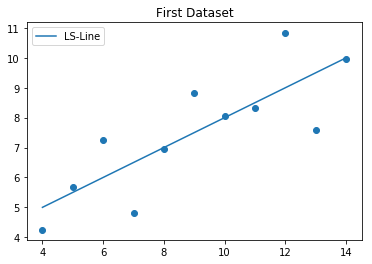

In [7]:
xs = first[:,0]
ys = first[:,1]
X = np.hstack((np.ones_like(xs.reshape(-1,1)),xs.reshape(-1,1)))
Y = ys
beta = least_square_qr(X,Y)
f = lambda x : beta[0] + beta[1]*x
plt.scatter(xs,ys)
x = np.linspace(min(xs),max(xs),100)
y = f(x)
plt.plot(x,y,label='LS-Line')
plt.legend(loc='best')
plt.title('First Dataset')
plt.show()

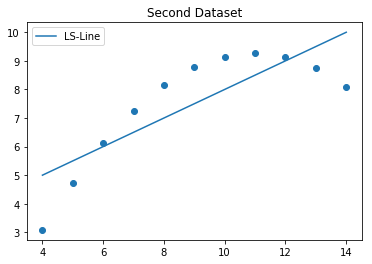

In [8]:
xs = second[:,0]
ys = second[:,1]
X = np.hstack((np.ones_like(xs.reshape(-1,1)),xs.reshape(-1,1)))
Y = ys
beta = least_square_qr(X,Y)
f = lambda x : beta[0] + beta[1]*x
plt.scatter(xs,ys)
x = np.linspace(min(xs),max(xs),100)
y = f(x)
plt.plot(x,y,label='LS-Line')
plt.legend(loc='best')
plt.title('Second Dataset')
plt.show()

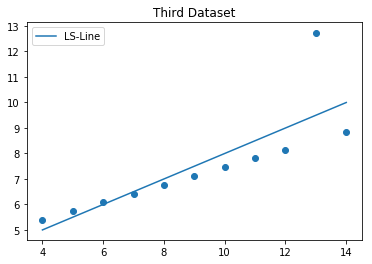

In [9]:
xs = third[:,0]
ys = third[:,1]
X = np.hstack((np.ones_like(xs.reshape(-1,1)),xs.reshape(-1,1)))
Y = ys
beta = least_square_qr(X,Y)
f = lambda x : beta[0] + beta[1]*x
plt.scatter(xs,ys)
x = np.linspace(min(xs),max(xs),100)
y = f(x)
plt.plot(x,y,label='LS-Line')
plt.legend(loc='best')
plt.title('Third Dataset')
plt.show()

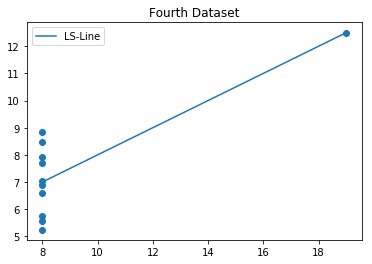

In [10]:
xs = fourth[:,0]
ys = fourth[:,1]
X = np.hstack((np.ones_like(xs.reshape(-1,1)),xs.reshape(-1,1)))
Y = ys
beta = least_square_qr(X,Y)
f = lambda x : beta[0] + beta[1]*x
plt.scatter(xs,ys)
x = np.linspace(min(xs),max(xs),100)
y = f(x)
plt.plot(x,y,label='LS-Line')
plt.legend(loc='best')
plt.title('Fourth Dataset')
plt.show()